In [2]:
import os
import re
import pickle
import cv2

from utils import calculate_right_top_coordinates
from openstreetmap_load_data import load_data_from_openstreetmap, find_objects_bounds
from google_api_load_data import load_prepare_and_cut_image

### 1. Загрузка всей возможной информации для одной картинки

In [3]:
satellites_folder = "dataset/satellite"
maps_folder = "dataset/map"
jsons_folder = "dataset/jsons"
objects_folder = "dataset/objects"
tags_folder = "dataset/tags"
corners_folder = "dataset/corners"

In [3]:
left_bottom_lat = 53
left_bottom_lon = 62

right_top_lat, right_top_lon = calculate_right_top_coordinates(left_bottom_lat, left_bottom_lon)
print(right_top_lat, right_top_lon)

53.24706593143501 62.54929133858268


In [4]:
%%time
data_id = 1
json_filepath = os.path.join(jsons_folder, str(data_id) + ".json")
load_data_from_openstreetmap(left_bottom_lat, left_bottom_lon, right_top_lat, right_top_lon, 
                             json_filepath)

CPU times: user 140 ms, sys: 8 ms, total: 148 ms
Wall time: 2.44 s


In [5]:
%%time
objects, tags = find_objects_bounds(json_filepath, right_top_lat, right_top_lon, left_bottom_lat, left_bottom_lon)

CPU times: user 36 ms, sys: 4 ms, total: 40 ms
Wall time: 46 ms


In [6]:
# Объекты и теги тоже заодно сохраним, но только при условии, что их получилось > 1
# Иначе сохранять не будем, а заодно и удалим json

In [7]:
should_be_deleted = len(tags) < 1
print(should_be_deleted)

False


In [8]:
if should_be_deleted:
    os.remove(json_filepath)
else:
    # Сохранить объекты и теги
    filename = str(data_id) + ".pickle"
    
    with open(os.path.join(objects_folder, filename), 'wb') as f:
        pickle.dump(objects, f)
    with open(os.path.join(tags_folder, filename), 'wb') as f:
        pickle.dump(tags, f)
    

In [9]:
# Дальше, раз уж удалять не пришлось, загружаем соответствующие картинки

In [10]:
%%time
img_cutted_satellite, img_cutted = load_prepare_and_cut_image(left_bottom_lat, left_bottom_lon, right_top_lat, right_top_lon)

CPU times: user 204 ms, sys: 16 ms, total: 220 ms
Wall time: 909 ms


In [11]:
filename = str(data_id) + ".png"
cv2.imwrite(os.path.join(satellites_folder, filename), img_cutted_satellite)
cv2.imwrite(os.path.join(maps_folder, filename), img_cutted)

True

**Собираем всё это в одну функцию**

In [13]:
def load_one(left_bottom_lat, left_bottom_lon, data_id):
    right_top_lat, right_top_lon = calculate_right_top_coordinates(left_bottom_lat, left_bottom_lon)
    
    json_filepath = os.path.join(jsons_folder, str(data_id) + ".json")
    load_data_from_openstreetmap(left_bottom_lat, left_bottom_lon, right_top_lat, right_top_lon, 
                                 json_filepath)
    objects, tags = find_objects_bounds(json_filepath, right_top_lat, right_top_lon, left_bottom_lat, left_bottom_lon)
    
    should_be_deleted = len(tags) < 1
    
    if should_be_deleted:
        os.remove(json_filepath)
        return None
    else:
        
        corners = {
            'right_top_lat': right_top_lat,
            'right_top_lon': right_top_lon,
            'left_bottom_lat': left_bottom_lat,
            'left_bottom_lon': left_bottom_lon
        }
        
        # Сохранить объекты, теги и углы
        filename = str(data_id) + ".pickle"

        with open(os.path.join(corners_folder, filename), 'wb') as f:
            pickle.dump(corners, f)
        with open(os.path.join(objects_folder, filename), 'wb') as f:
            pickle.dump(objects, f)
        with open(os.path.join(tags_folder, filename), 'wb') as f:
            pickle.dump(tags, f)
            
    img_cutted_satellite, img_cutted = load_prepare_and_cut_image(left_bottom_lat, left_bottom_lon,
                                                                  right_top_lat, right_top_lon)
    filename = str(data_id) + ".png"
    cv2.imwrite(os.path.join(satellites_folder, filename), img_cutted_satellite)
    cv2.imwrite(os.path.join(maps_folder, filename), img_cutted)
    
    return objects, tags, img_cutted_satellite, img_cutted

In [14]:
%%time
result = load_one(53, 62, 1)
if result is not None:
    objects, tags, img_cutted_satellite, img_cutted = result

CPU times: user 372 ms, sys: 12 ms, total: 384 ms
Wall time: 2.85 s


In [15]:
print(len(objects))

330


**Рисуем картиночку**

In [10]:
from rectangles_drawing import calculate_one_pixels_diffs, draw_all_rectangles
import matplotlib.pyplot as plt

0 water
1 water
2 water
3 water
4 water
5 water
6 water
7 water
8 water
9 water
10 water
11 water
12 water
13 water
14 water
15 water
16 water
17 water
18 water
19 wood
20 wood
21 wood
22 wood
23 wood
24 wood
25 wood
26 wood
27 wood
28 wood
29 wood
30 wood
31 wood
32 wood
33 wood
34 wood
35 wood
36 wood
37 wood
38 wood
39 wood
40 wood
41 wood
42 wood
43 wood
44 wood
45 wood
46 wood
47 wood
48 wood
49 wood
50 wood
51 wood
52 wood
53 wood
54 wood
55 wood
56 wood
57 wood
58 wood
59 wood
60 wood
61 wood
62 wood
63 wood
64 wood
65 wood
66 wood
67 wood
68 wood
69 wood
70 wood
71 wood
72 wood
73 wood
74 wood
75 wood
76 wood
77 wood
78 wood
79 wood
80 wood
81 wood
82 wood
83 wood
84 wood
85 wood
86 wood
87 wood
88 wood
89 wood
90 wood
91 wood
92 wood
93 wood
94 wood
95 wood
96 wood
97 wood
98 wood
99 wood
100 wood
101 wood
102 wood
103 wood
104 wood
105 wood
106 wood
107 wood
108 wood
109 wood
110 wood
111 wood
112 wood
113 wood
114 wood
115 wood
116 wood
117 wood
118 wood
119 wood
120 wood
12

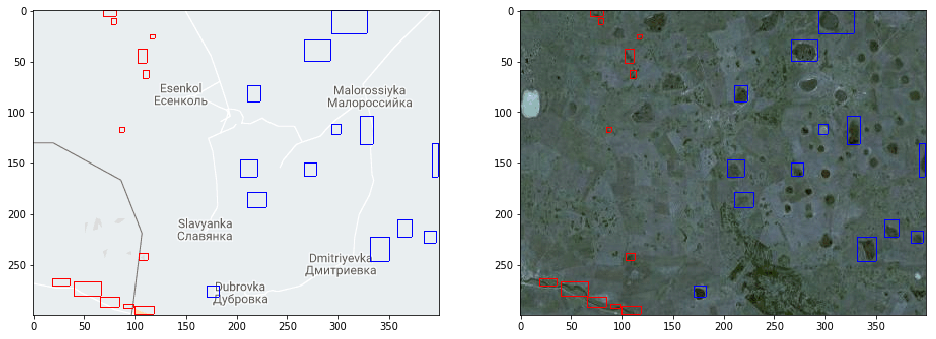

In [17]:
right_top_lat, right_top_lon = calculate_right_top_coordinates(left_bottom_lat, left_bottom_lon)
one_pixel_lat_diff, one_pixel_lon_diff = calculate_one_pixels_diffs(right_top_lat, right_top_lon,
                                                                    left_bottom_lat, left_bottom_lon,
                                                                    img_cutted.shape)
img_new = draw_all_rectangles(img_cutted, objects, tags, right_top_lat, right_top_lon, left_bottom_lat, left_bottom_lon,
                       one_pixel_lat_diff, one_pixel_lon_diff)
img_new_satellite = draw_all_rectangles(img_cutted_satellite, objects, tags, right_top_lat, right_top_lon, left_bottom_lat,
                                        left_bottom_lon,
                       one_pixel_lat_diff, one_pixel_lon_diff)

plt.figure(figsize=(16, 10))
plt.subplot(121)
plt.imshow(img_new)
plt.subplot(122)
plt.imshow(img_new_satellite)
plt.show()

**Цикл по left_bottom_lat, left_bottom_lon**

In [19]:
import numpy as np
import sys

In [ ]:
%%time
data_id = 2
for left_bottom_lat in np.arange(1, 80, 0.2):
    for left_bottom_lon in np.arange(1, 80, 0.2):
        break
#         print(left_bottom_lat, left_bottom_lon, data_id)
        
        if data_id % 10 == 0:
            print(data_id, left_bottom_lat, left_bottom_lon)
        
        try:
            res = load_one(left_bottom_lat, left_bottom_lon, data_id)
#             print(res)
            if res is not None:
#                 objects, tags, img_cutted_satellite, img_cutted = res
#                 print(tags)
                data_id += 1
                
        except Exception as e:
            print(left_bottom_lat, left_bottom_lon)
            print(e)
            
        sys.stdout.flush()
#         break
    break
            

**Анализ сгенерённого датасета**

In [4]:
len(os.listdir(corners_folder))

21849

In [5]:
dataset_len = len(os.listdir(corners_folder))

В итоговом датасете получилось 21849 изображений.

***Оценим, сколько раз встречается каждый из классов и максимальное количество раз, когда один класс встречается на одном изображении, а также среднее количество встречаний класса на одном изображении***

In [6]:
from collections import Counter

In [18]:
%%time

# сколько максимальное количество раз один объект встречается на одном изображении
max_count_one_object_on_image = 0

# суммарное количество тегов для каждого типа объектов
each_object_sum_counts = {
    'water':0,
    'wood':0,
    'ridge':0,
    'peak':0,
    'valley':0
}

# Количества каждого из классов на одном изображении
each_tag_counts = {
    'water':[],
    'wood':[],
    'ridge':[],
    'peak':[],
    'valley':[]
}


for root, dirs, files in os.walk(corners_folder):
    for file in files:
        with open(os.path.join(tags_folder, file), 'rb') as f:
            tags = pickle.load(f)
            
            for tag, count in Counter(tags).items():
                each_object_sum_counts[tag] += count
                
                if count > max_count_one_object_on_image:
                    max_count_one_object_on_image = count
                
                each_tag_counts[tag].append(count)
        
print(max_count_one_object_on_image)
print(each_object_sum_counts)

978
{'peak': 99921, 'valley': 15450, 'ridge': 8142, 'water': 228968, 'wood': 113376}
CPU times: user 556 ms, sys: 508 ms, total: 1.06 s
Wall time: 1.88 s


In [19]:
# среднее количество раз, сколько объекты одного типа встречаются на одном изображении
avg_object_one_image_count = {}


for tag, count in each_object_sum_counts.items():
    avg_object_one_image_count[tag] = count / dataset_len
    
avg_object_one_image_count

{'peak': 4.573252780447618,
 'ridge': 0.3726486338047508,
 'valley': 0.7071261842647261,
 'water': 10.479564282118174,
 'wood': 5.189070438006316}

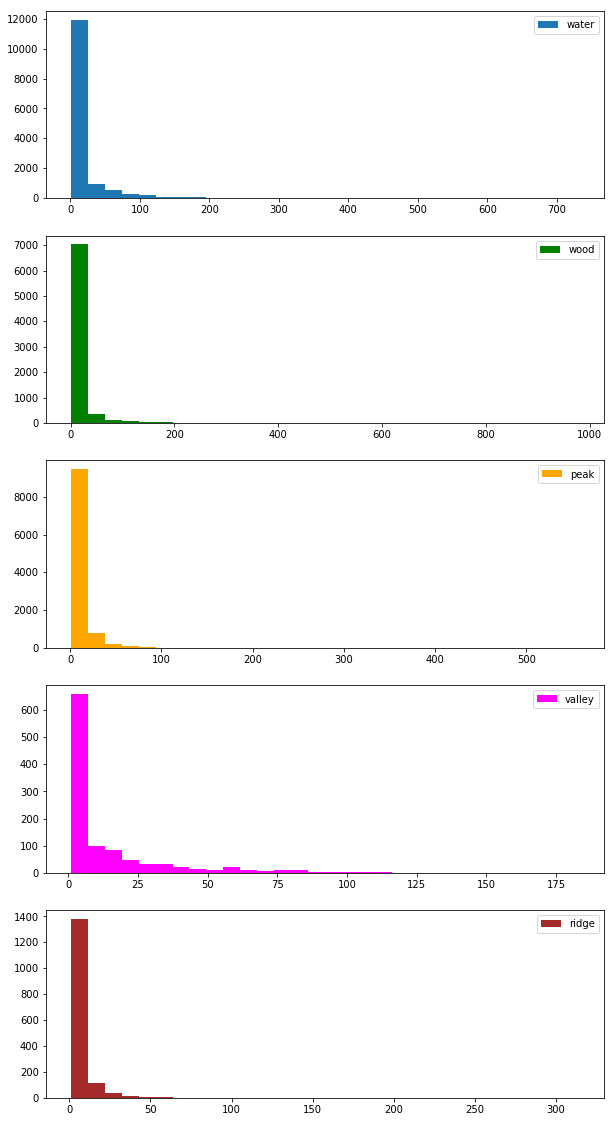

In [20]:
# График распределения количеств раз, сколько вода встречается на одной картинке
plt.figure(figsize=(10, 20))

plt.subplot(511)
plt.hist(each_tag_counts['water'], label='water', bins=30)
plt.legend()

plt.subplot(512)
plt.hist(each_tag_counts['wood'], label='wood', color='green', bins=30)
plt.legend()

plt.subplot(513)
plt.hist(each_tag_counts['peak'], label='peak', color='orange', bins=30)
plt.legend()

plt.subplot(514)
plt.hist(each_tag_counts['valley'], label='valley', color='magenta', bins=30)
plt.legend()

plt.subplot(515)
plt.hist(each_tag_counts['ridge'], label='ridge', color='brown', bins=30)
plt.legend()

plt.show()

Как можно видеть из представленных распределений, всего на картинках обычно немного, но бывают и исключения. Например, где-то точно есть фотография со спутника, на которой больше 200 хребтов. Кроме того, долин на одном изображении в целом редко бывает много (настолько много, как может быть других объектов), но это и так видно из среднего значения, а также из того, что долин вообще очень мало (всего около 15000). А больше всего на одном изображении в принципе бывает фрагментов леса (около 1000) пиков или воды.

Нарисуем несколько исключений:
    
- одну картинку с долинами (больше 50)

- одну картинку, на которой больше 200 хребтов

- одну картинку, на которой больше 800 фрагментов леса

- одну картинку, на которой больше 600 фрагментов воды

- одну картинку, на которой больше 400 пиков

In [21]:
%%time
image_to_show_valleys = None
image_to_show_ridges = None
image_to_show_wood = None
image_to_show_peak = None
image_to_show_water = None

for root, dirs, files in os.walk(corners_folder):
    for file in files:
        with open(os.path.join(tags_folder, file), 'rb') as f:
            tags = pickle.load(f)
            c = Counter(tags)
            
            image_filename = file.split('.')[0] + '.png'
            
            if c['ridge'] > 200 and image_to_show_ridges is None:
                image_to_show_ridges = image_filename
                
            if c['valley'] > 50 and image_to_show_valleys is None:
                image_to_show_valleys = image_filename
                
            if c['wood'] > 800 and image_to_show_wood is None: 
                image_to_show_wood = image_filename
                
            if c['peak'] > 400 and image_to_show_peak is None: 
                image_to_show_peak = image_filename
            
            if c['water'] > 600 and image_to_show_water is None: 
                image_to_show_water = image_filename
            
            
            if (image_to_show_valleys is not None and image_to_show_ridges is not None and image_to_show_wood is not None
               and image_to_show_peak is not None and image_to_show_water is not None):
                break
            
print("Valleys:", image_to_show_valleys)
print("Ridges:", image_to_show_ridges)
print("Wood:", image_to_show_wood)
print("Peak:", image_to_show_peak)
print("Water:", image_to_show_water)

Valleys: 8464.png
Ridges: 17784.png
Wood: 3072.png
Peak: 20920.png
Water: 6480.png
CPU times: user 644 ms, sys: 480 ms, total: 1.12 s
Wall time: 1.95 s


In [14]:
def show_image_with_boxes(image_name):
    img_id = image_name.split('.')[0]
    pickle_filename = img_id + '.pickle'
    
    with open(os.path.join('dataset/corners/', pickle_filename), 'rb') as f:
        corners = pickle.load(f)
    
    with open(os.path.join('dataset/objects/', pickle_filename), 'rb') as f:
        objects = pickle.load(f)

    with open(os.path.join('dataset/tags/', pickle_filename), 'rb') as f:
        tags = pickle.load(f)
        
    img = cv2.imread(os.path.join('dataset/map/', image_name))
    img_satellite = cv2.imread(os.path.join('dataset/satellite/', image_name))
    
    right_top_lat = corners['right_top_lat']
    right_top_lon = corners['right_top_lon']
    left_bottom_lat = corners['left_bottom_lat']
    left_bottom_lon = corners['left_bottom_lon']
    
    one_pixel_lat_diff, one_pixel_lon_diff = calculate_one_pixels_diffs(right_top_lat, right_top_lon, 
                                                                        left_bottom_lat, left_bottom_lon, img.shape)

    img_new = draw_all_rectangles(cv2.cvtColor(img, cv2.COLOR_BGR2RGB),
                                  objects, tags, right_top_lat, right_top_lon, left_bottom_lat, left_bottom_lon,
                                  one_pixel_lat_diff, one_pixel_lon_diff)
    img_new_satellite = draw_all_rectangles(cv2.cvtColor(img_satellite, cv2.COLOR_BGR2RGB),
                                            objects, tags, right_top_lat, right_top_lon, left_bottom_lat,
                                            left_bottom_lon, one_pixel_lat_diff, one_pixel_lon_diff)

    plt.figure(figsize=(16, 10))
    plt.subplot(121)
    plt.imshow(img_new)
    plt.subplot(122)
    plt.imshow(img_new_satellite)
    plt.show()

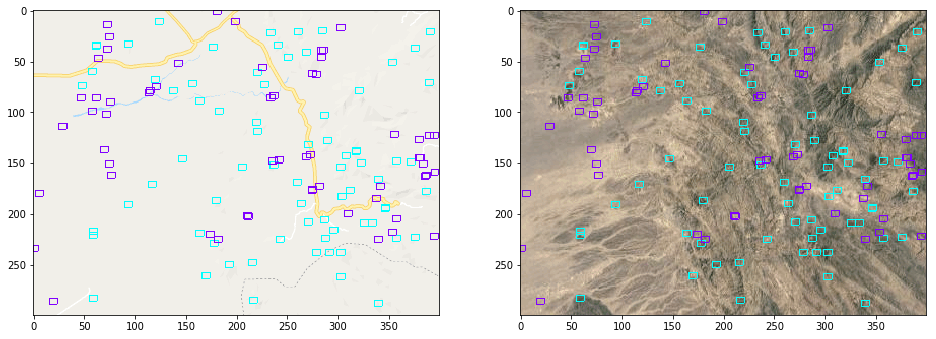

In [22]:
# valleys
show_image_with_boxes(image_to_show_valleys)

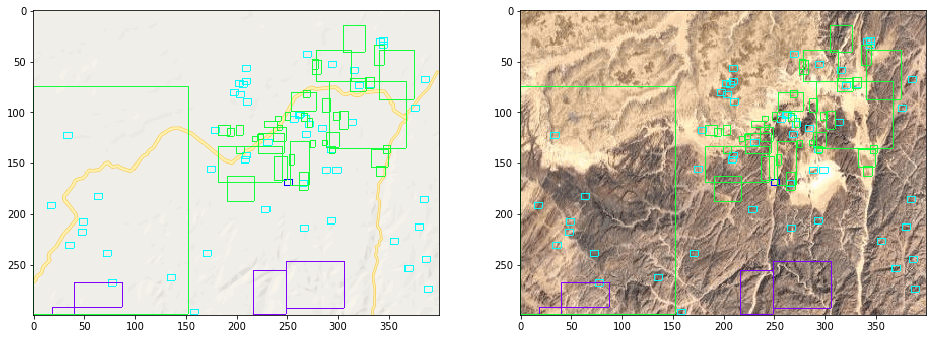

In [23]:
# ridges
show_image_with_boxes(image_to_show_ridges)

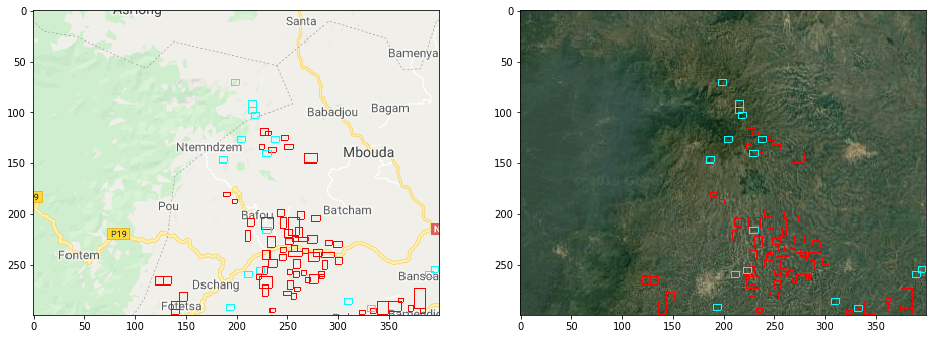

In [24]:
# wood
show_image_with_boxes(image_to_show_wood)

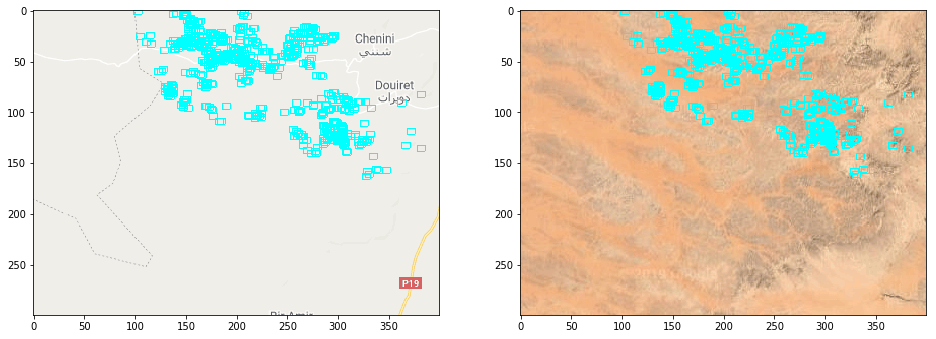

In [25]:
# peak
show_image_with_boxes(image_to_show_peak)

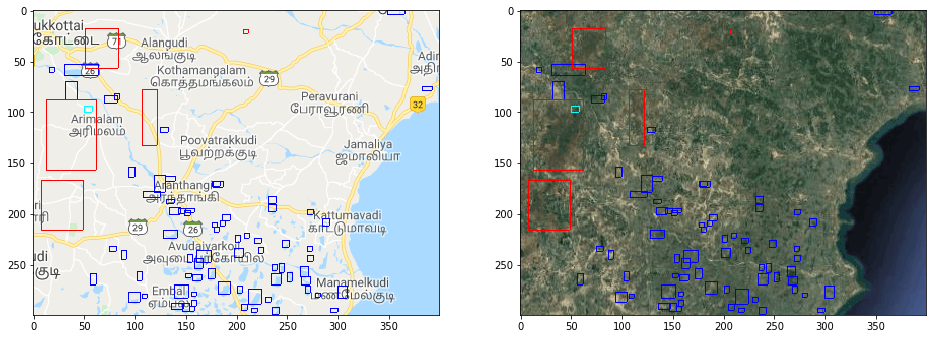

In [26]:
# water
show_image_with_boxes(image_to_show_water)